# Titanic - Machine Learning from Disaster ( kaggel Competition )

# The competition is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
# la bibliothèque de visualisation de données 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# WorkFlow Stages

In [16]:
data=pd.read_csv(r'C:\Users\pc\ML\Titanic Project\train.csv')
data2=pd.read_csv(r'C:\Users\pc\ML\Titanic Project\test.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
data.head()
#Afficher les 5 1ére data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1- Explore Data

In [35]:
data.all()

PassengerId     True
Survived       False
Pclass          True
Name            True
Sex             True
Age             True
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
data.shape

(891, 12)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
ss=data.isnull().sum()
#ss[ss>0]
ss

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

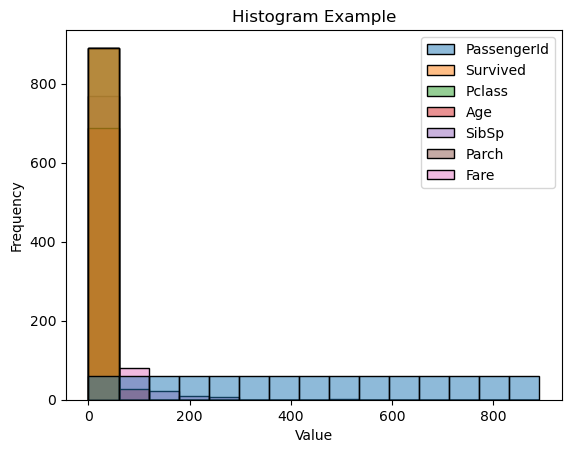

In [32]:
# Create a histogram
sns.histplot(data, bins=15)
# Customize with labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
# Display the plot
plt.show()

<AxesSubplot:>

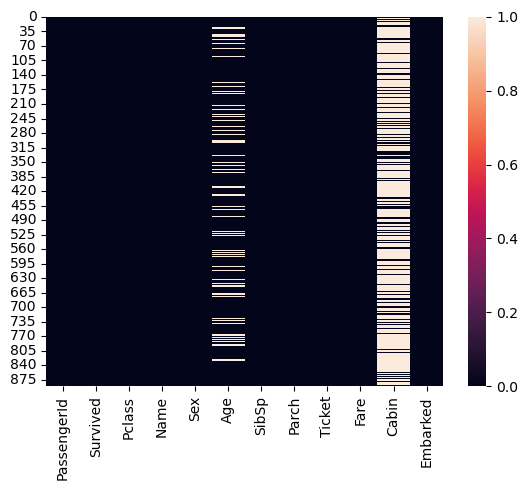

In [33]:
sns.heatmap(data.isnull())

# Cleaning Data

In [37]:
# Supprimer les lignes contenant au moins une valeur manquante
#data_cleaned = data.dropna()
# Remplacer les valeurs manquantes par une valeur spécifique (par exemple, 0)
#data_filled = data.fillna(0)

def clean(df):
    df.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
    df.Age=df.Age.fillna(df.Age.median())
    df.dropna()
    return df


In [38]:
clean(data)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


<AxesSubplot:>

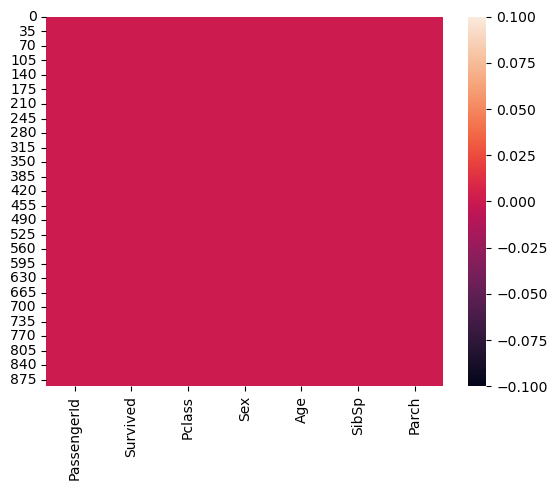

In [40]:
sns.heatmap(data.isnull())
#je suis remarquer rien des valeurs qui sonts null

In [41]:
clean(data2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


# 3-Data Analysis

In [47]:
data.corr()
#Cette fonction est utilisée pour calculer 
#la corrélation entre les colonnes d'un objet de données

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000


<AxesSubplot:>

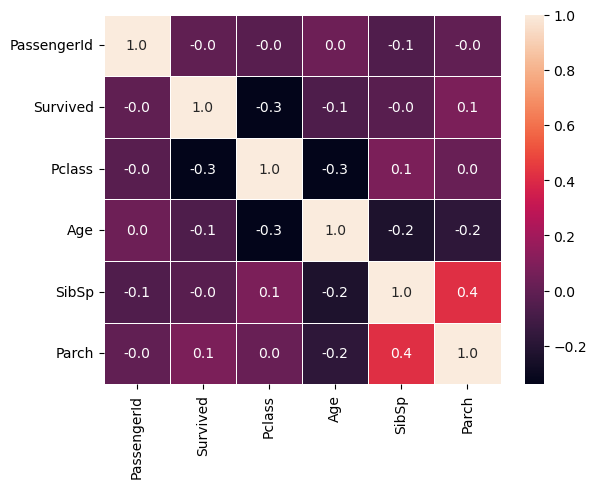

In [43]:
rel=data.corr()   
#poser des question pour dire que est ce que AGe est intressant ? 
#il fout faire la matrice de corelation pour comprendre bien la relation entre ces 
#data
sns.heatmap(rel,annot=True,fmt='.1f',linewidth=.5) ## relation between data 

In [48]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

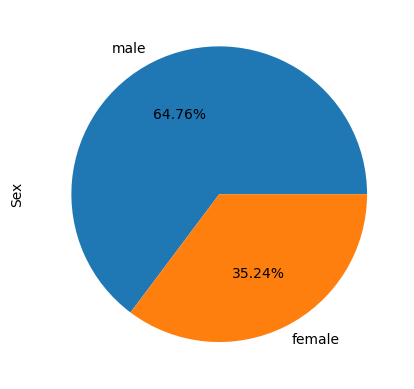

In [56]:
data.Sex.value_counts().plot.pie(autopct='%0.2f%%')
#pie is fatira in arabic 

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

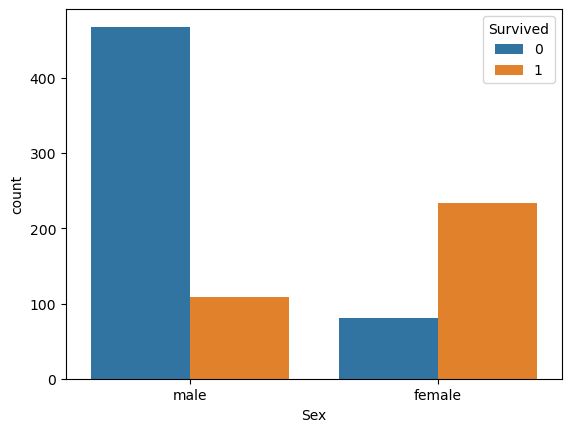

In [59]:
sns.countplot(data.Sex,hue=data.Survived)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

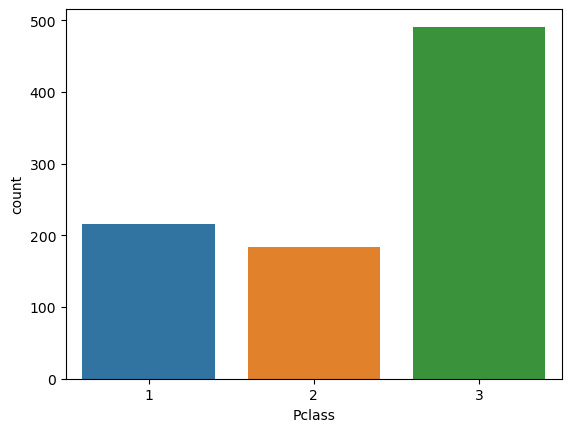

In [61]:
sns.countplot(data.Pclass)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

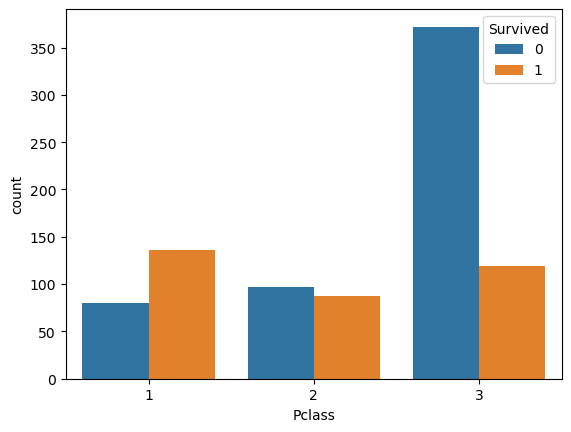

In [60]:
sns.countplot(data.Pclass,data=data,hue=data.Survived) 

<AxesSubplot:xlabel='Age', ylabel='Count'>

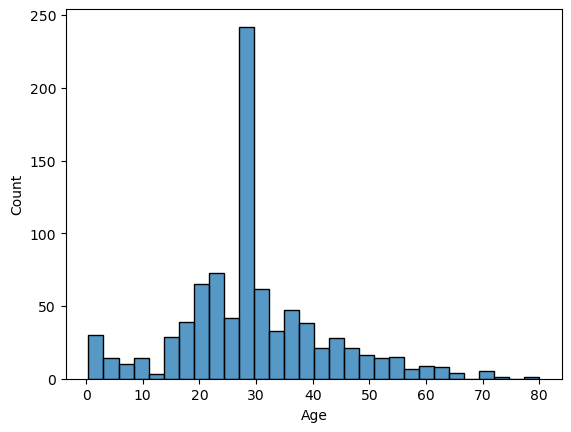

In [62]:
sns.histplot(data.Age)

# Transformation Data

In [67]:
#data.Sex=pd.get_dummies(data.Sex)
data.Sex=pd.get_dummies(data.Sex,drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    uint8  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), uint8(1)
memory usage: 42.8 KB


In [71]:
data2.Sex=pd.get_dummies(data2.Sex,drop_first=True)
data2
#object to int or a number 

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0
414,1306,1,0,39.0,0,0
415,1307,3,1,38.5,0,0
416,1308,3,1,27.0,0,0


# Creat Model

In [72]:
accuracies=[] 

In [81]:
x=data.drop(['Survived'],axis=1)
y=data.Survived

In [86]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=2)
#L'argument test_size=0.2 indique que vous souhaitez
#réserver 20% des données pour l'ensemble de test et le reste (80%)
#sera utilisé pour l'ensemble d'entraînement.

In [89]:
 model1=DecisionTreeClassifier()

In [91]:
 model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
dd=model1.predict(x_test)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

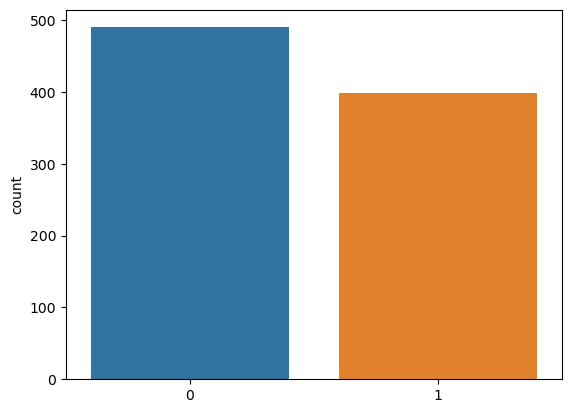

In [95]:
sns.countplot(dd)
dd

In [98]:
accuracy_score(dd,y_test)

0.6670416197975253

In [101]:
def all(model):
    model.fit(x_train,y_train)
    dd=model.predict(x_test)
    accuracy=accuracy_score(dd,y_test)
    print('Accuracy=',accuracy)
    accuracies.append(accuracy)

In [102]:
model2=LogisticRegression()
all(model2)

Accuracy= 0.4578177727784027


In [107]:
model3=RandomForestClassifier()
all(model3)

Accuracy= 0.7581552305961755


In [105]:
model5=SVC()
all(model5)

Accuracy= 0.4578177727784027


In [113]:
model4 = KNeighborsClassifier(n_neighbors=1)  # Utiliser 1 voisin
all(model4)


Accuracy= 0.4578177727784027


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [108]:
model6=GradientBoost ingClassifier()
all(model6)

Accuracy= 0.7390326209223848


In [109]:
model7=DecisionTreeClassifier()
all(model7)

Accuracy= 0.45894263217097864


In [110]:
model8=GaussianNB()
all(model8)

Accuracy= 0.4578177727784027


In [115]:
Algorithm=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifie','KNeighborsClassifier',
          'GaussianNB','SVC']

In [116]:
new=pd.DataFrame({'Algorithm':Algorithm,'Score':accuracies})
new

,Algorithm,Score
0,LogisticRegression,0.457818
1,RandomForestClassifier,0.457818
2,GradientBoostingClassifier,0.758155
3,DecisionTreeClassifie,0.739033
4,KNeighborsClassifier,0.458943
5,GaussianNB,0.457818
6,SVC,0.457818


# Best Algorithm  GradientBosstingClassifier

In [123]:
last_model=GradientBoostingClassifier()
last_model.fit(x_train,y_train)

#last_model = GradientBoostingClassifier(): Dans cette ligne,
#vous créez une instance du modèle de classification 
#GradientBoostingClassifier 
#en l'assignant à la variable last_model.
#En résumé, ces deux lignes de code créent une instance du 
#modèle GradientBoostingClassifier et l'entraînent sur les données
#d'entraînement fournies. Une fois l'entraînement terminé, 
#le modèle peut être utilisé pour faire des prédictions sur
#de nouvelles données non vues
#auparavant.

GradientBoostingClassifier()

In [124]:
lpre=last_model.predict(data2)
#utilise le modèle last_model (probablement un modèle
#entraîné avec GradientBoostingClassifier) pour faire
#des prédictions sur de nouvelles données contenues
#dans data2.

In [120]:
final=data2.PassengerId  

#En résumé, la ligne de code extrait la colonne PassengerId
#du DataFrame data2 et stocke les valeurs de 
#cette colonne dans la variable final. Cela
#pourrait être utile si vous avez besoin de 
#cette colonne spécifique pour des opérations ultérieures.


In [121]:
 df=pd.DataFrame({'PassengerId':final,'Survived':lpre})

In [125]:
df .to_csv('submission.csv',index=False)  

#est utilisée pour enregistrer les données 
#d'un DataFrame dans un fichier CSV 
#(Comma-Separated Values), ce qui est couramment utilisé pour 
#stocker des données tabulaires.